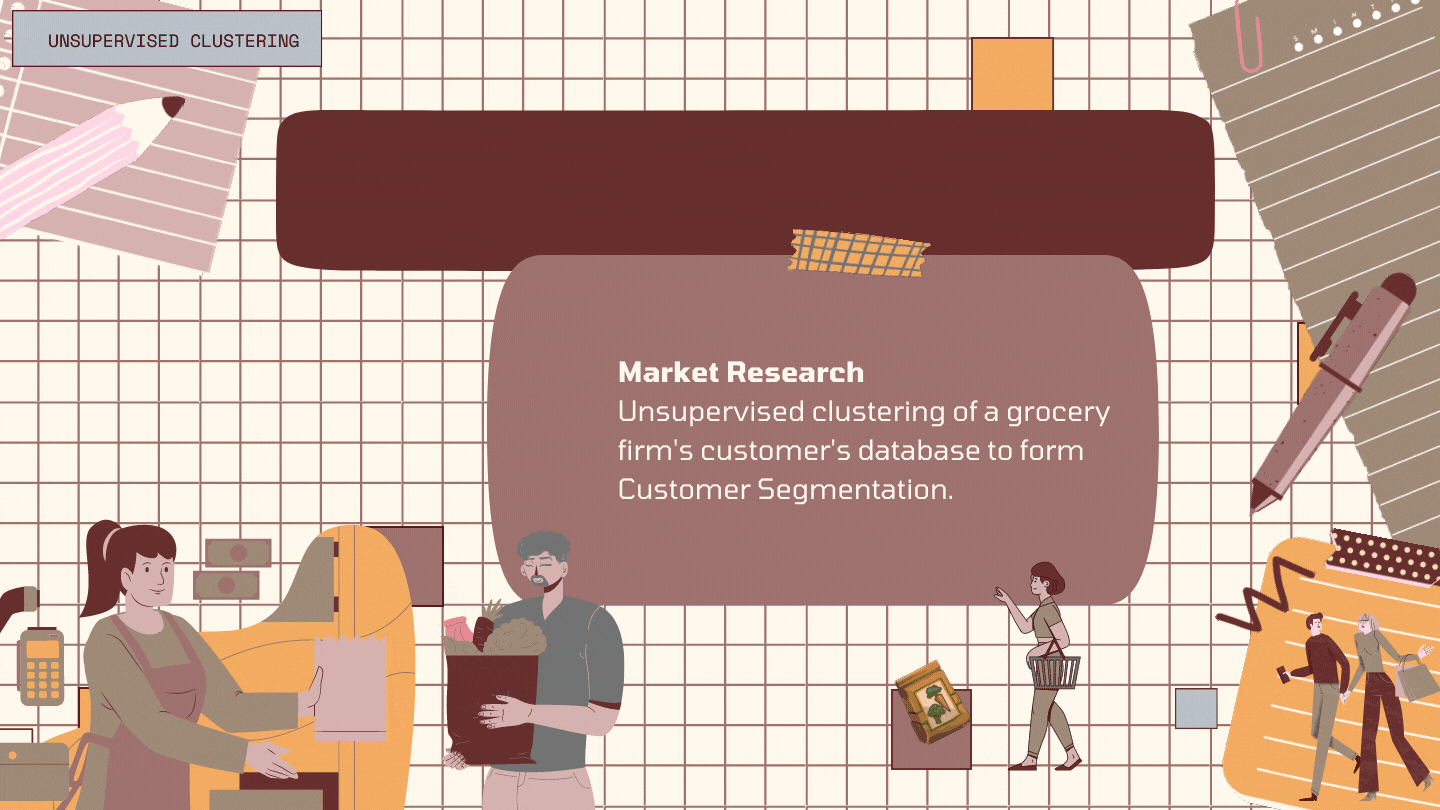

In [1]:
import PIL
from PIL import Image
img =  PIL.Image.open('D:/libraries/Blank Education.gif')
img

## Importing libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.colors import ListedColormap
import seaborn as sns
from pathlib import Path
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Path('D:/libraries/Cutomer Segmentation').mkdir(parents=True,exist_ok=True)


## Importing dataset

In [3]:
cust_seg =pd.read_csv('D:/libraries/Cutomer Segmentation/marketing campeign.csv',encoding='latin-1')
print('Number of datapoints:',len(cust_seg))

Number of datapoints: 2240


In [4]:
cust_seg.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


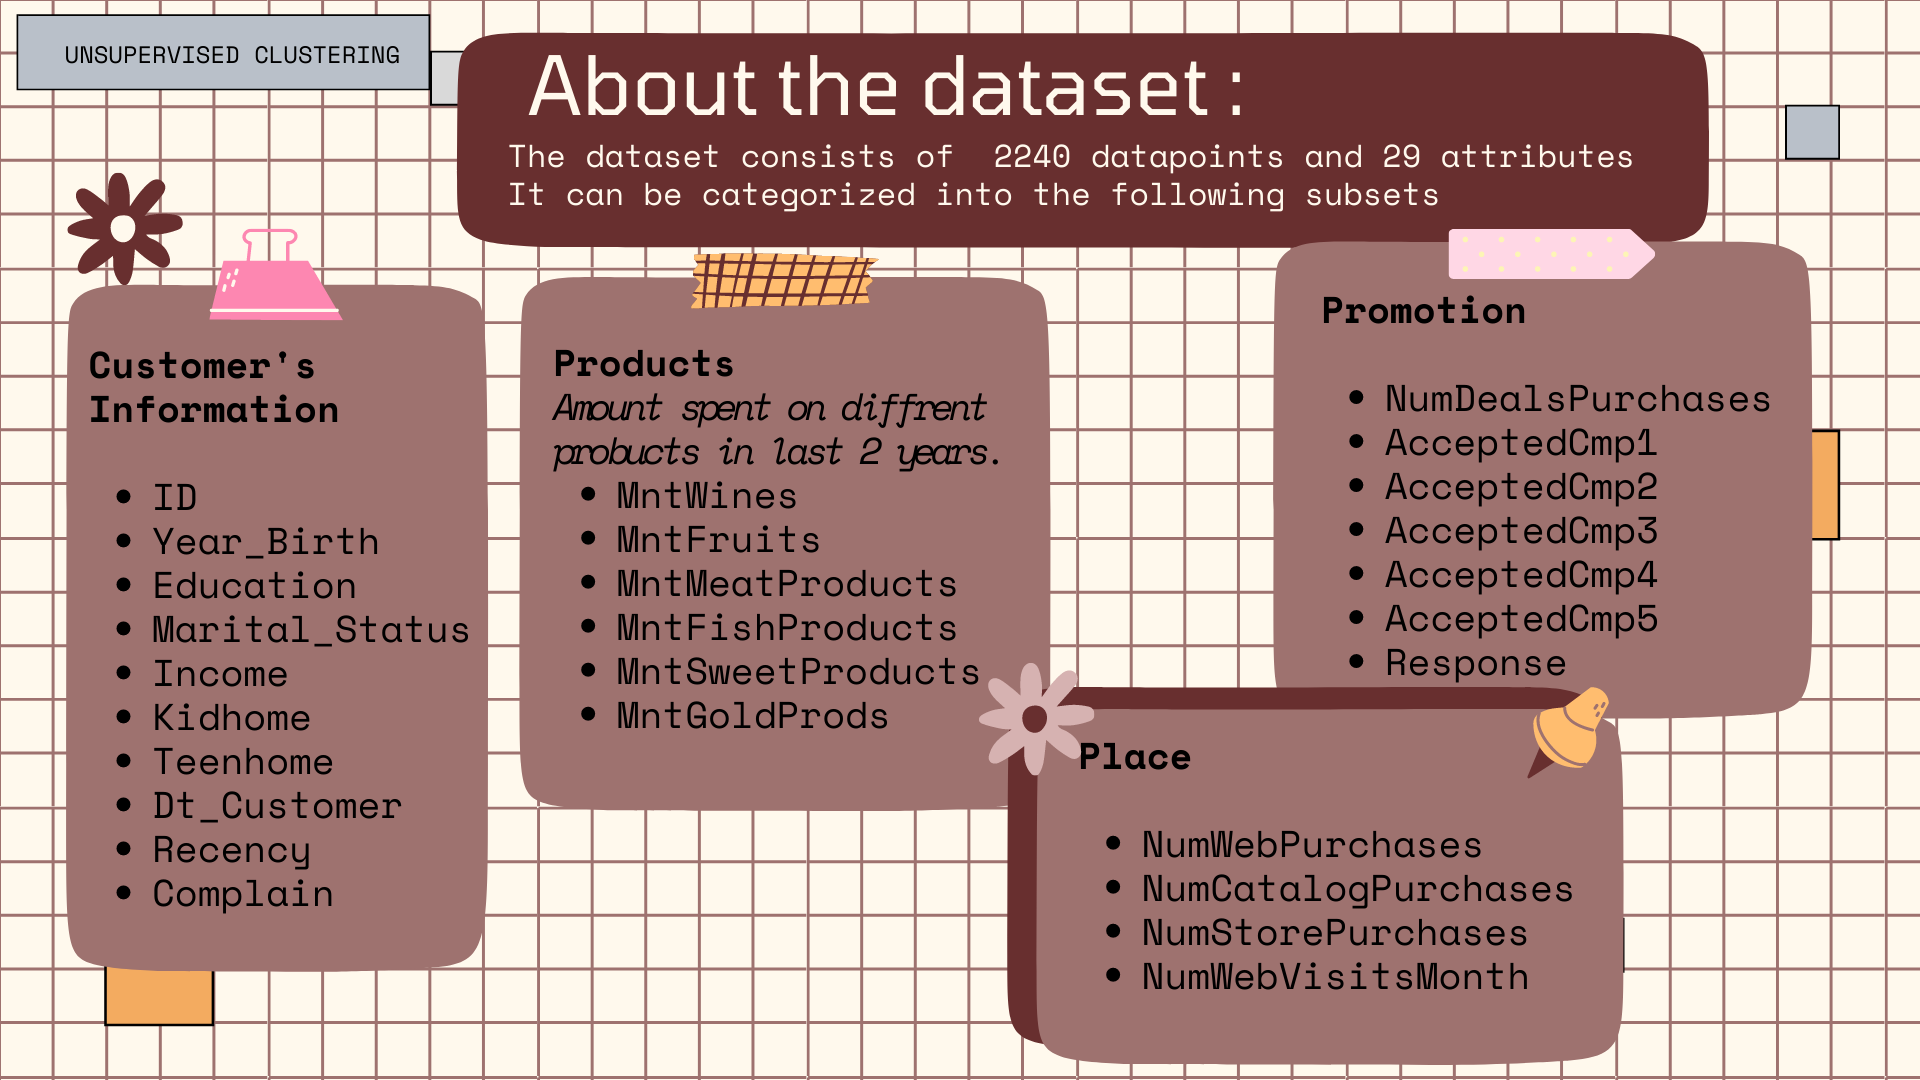

In [5]:
about =PIL.Image.open('D:/libraries/Cutomer Segmentation/about.png')
about

### Data Cleaning

In [6]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
cust_seg.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
def bar_data(x,y,palette_len,xlim=None,ylim=None,xticklabels=None,yticklabels=None,xlabel=None,
             ylabel=None,title='missing data(%)',figsize = (14,14),axis_grid = 'y'):
    cmap=sns.color_palette('plasma')
    fig,ax=plt.subplots(figsize=figsize)
    plt.title(title,size = 15, fontweight = 'bold',y=1.05,fontfamily='serif')
    
    
    for i in ['top','bottom','left','right']:
        ax.spines[i].set_color('black')
    ax.spines['top'].set_visible(False);ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False);ax.spines['right'].set_visible(False)
    ax.set_xlim(xlim);ax.set_ylim(ylim)
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    sns.barplot(x=x,y=y,edgecolor='black',ax=ax,palette=cmap)
    ax.grid(axis = axis_grid,ls='--',alpha = 0.9)
    plt.show()
    
    


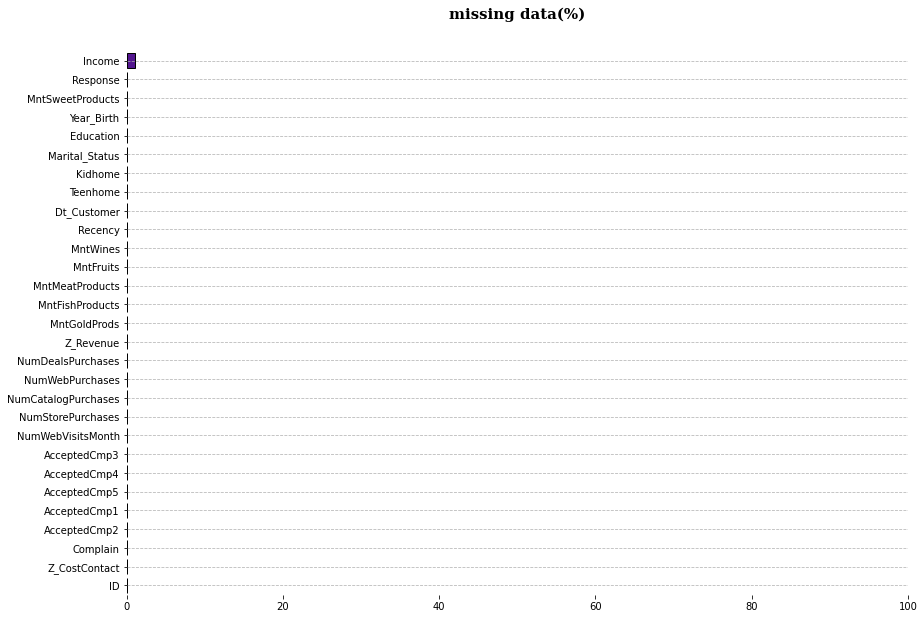

In [9]:
# null data
cust_seg.replace(['-1.0', '-1', '1', -1],np.nan,inplace=True)
null_data=(cust_seg.isnull().sum()/len(cust_seg)*100).sort_values(ascending=False)
bar_data(x=null_data,y=null_data.index,xlim=(0,100),palette_len=null_data.index,title='missing data(%)',
         xticklabels=range(0,101,20),yticklabels=null_data.index,figsize=(14,10),axis_grid='y')

From the above output, we can conclude and note that:

    *There are missing values in income
    *Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
    *There are some categorical features in our data frame; as there are some features in dtype: object).
     So we will need to encode them into numeric forms later.

First of all, for the missing values, I am simply going to drop the rows that have missing income values.


In [10]:
# to remove NA values
cust_seg =cust_seg.dropna()
print("The total number of data-points after removing the rows with missing values are:",len(cust_seg))

The total number of data-points after removing the rows with missing values are: 2216




*In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

In [11]:
cust_seg.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
cust_seg.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [13]:
import datetime
cust_seg['Dt_Customer'] =pd.to_datetime(cust_seg['Dt_Customer'])
dates=[]
for i in cust_seg['Dt_Customer']:
    i=i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08




Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded dat

In [14]:
#Created a feature "Customer_For"
days =[]
day=max(dates)
for i in dates:
    delta =day-i
    days.append(delta)
cust_seg['Customer_For']=days
cust_seg['Customer_For'] = pd.to_numeric(cust_seg['Customer_For'], errors="coerce")




Now we will be exploring the unique values in the categorical features to get a clear idea of the data.


In [15]:
print('Total categories in the Martial status:\n',cust_seg['Marital_Status'].value_counts(),'\n')
print('Total categories features in Education:\n',cust_seg['Education'].value_counts())

Total categories in the Martial status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Total categories features in Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64



    * Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
    * Create another feature "Spent" indicating the total amount spent by the customer in various categories over the 
      span of two years.
    * Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
    * Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
    * To get further clarity of household, Creating feature indicating "Family_Size"
    * Create a feature "Is_Parent" to indicate parenthood status
    *Lastly, I will create three categories in the "Education" by simplifying its value counts.
    * Dropping some of the redundant features


In [16]:
# age of the customer
cust_seg['Age'] =2023-cust_seg['Year_Birth']

# money spend
cust_seg['Spend'] =cust_seg['MntWines']+cust_seg['MntFruits']+cust_seg['MntMeatProducts'] 
+cust_seg['MntFishProducts']+ cust_seg['MntSweetProducts']+cust_seg['MntGoldProds']

#Deriving living situation by marital status"Alone"
cust_seg['Living_with']=cust_seg['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Single':'Alone'
                                                            ,'Divorced':'Alone','Widow':'Alone','YOLO':'Alone','Absurd':'Alone'})

#Feature indicating total children living in the household
cust_seg['Children'] = cust_seg['Kidhome']+cust_seg['Teenhome']

#Feature for total members in the householde
cust_seg['family_size']=cust_seg['Living_with'].replace({'Partner':2,'Alone':1})+cust_seg['Children'] 

#Feature pertaining parenthood
cust_seg['is_parent']=np.where(cust_seg['Children']>0,1,0)

#Segmenting education levels in three group
cust_seg['Education'] =cust_seg['Education'].replace({"Graduation":"Graduate","PhD":"Postgraduate",'Basic':'Undergraduate',
                                                      'Master':'Postgraguate','2n Cycle':'Undergraduate'})

#For clarity
cust_seg =cust_seg.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits','MntMeatProducts':'Meat', 
                                   'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet','MntGoldProds':'Gold'})

#drop some unuseable columns

cust_seg=cust_seg.drop(columns=["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"],axis=1)



Now that we have some new features let's have a look at the data's stats

In [17]:

pd.set_option('display.max_columns',30)
cust_seg.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spend,Children,family_size,is_parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,54.179603,498.443592,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,521.461805,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,0.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,46.000000,43.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,53.000000,296.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,64.000000,854.250000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,130.000000,2246.000000,3.000000,5.000000,1.000000




The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that max-age is 130 years, As I calculated the age that would be today (i.e. 2023) and the data is old.

I must take a look at the broader view of the data. I will plot some of the selected features.


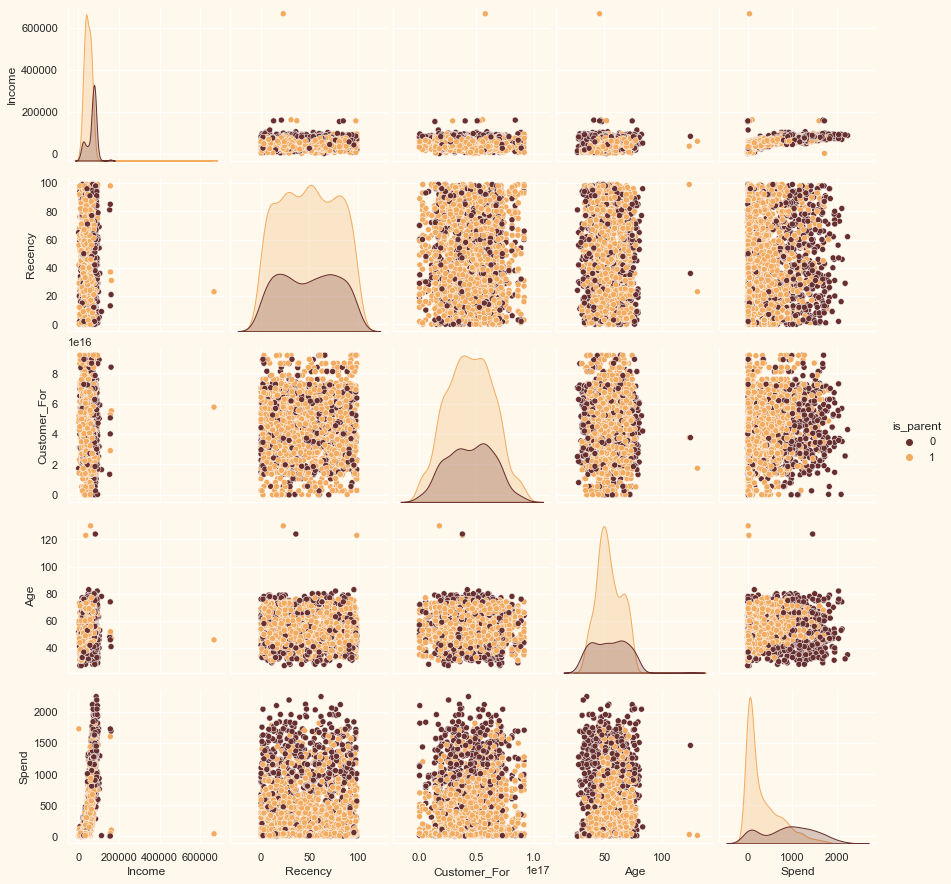

In [18]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#To plot some selected
to_list = ["Income", "Recency", "Customer_For", "Age", "Spend", "is_parent"]
sns.pairplot(cust_seg[to_list],hue='is_parent',palette= (["#682F2F","#F3AB60"]))



Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.


In [19]:
#Dropping the outliers by setting a cap on Age and income.
cust_seg =cust_seg[cust_seg['Age']<90]
cust_seg =cust_seg[cust_seg['Income']<600000]
print("The total number of data-points after removing the outliers are:",len(cust_seg))

The total number of data-points after removing the outliers are: 2212




Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point

<AxesSubplot:>

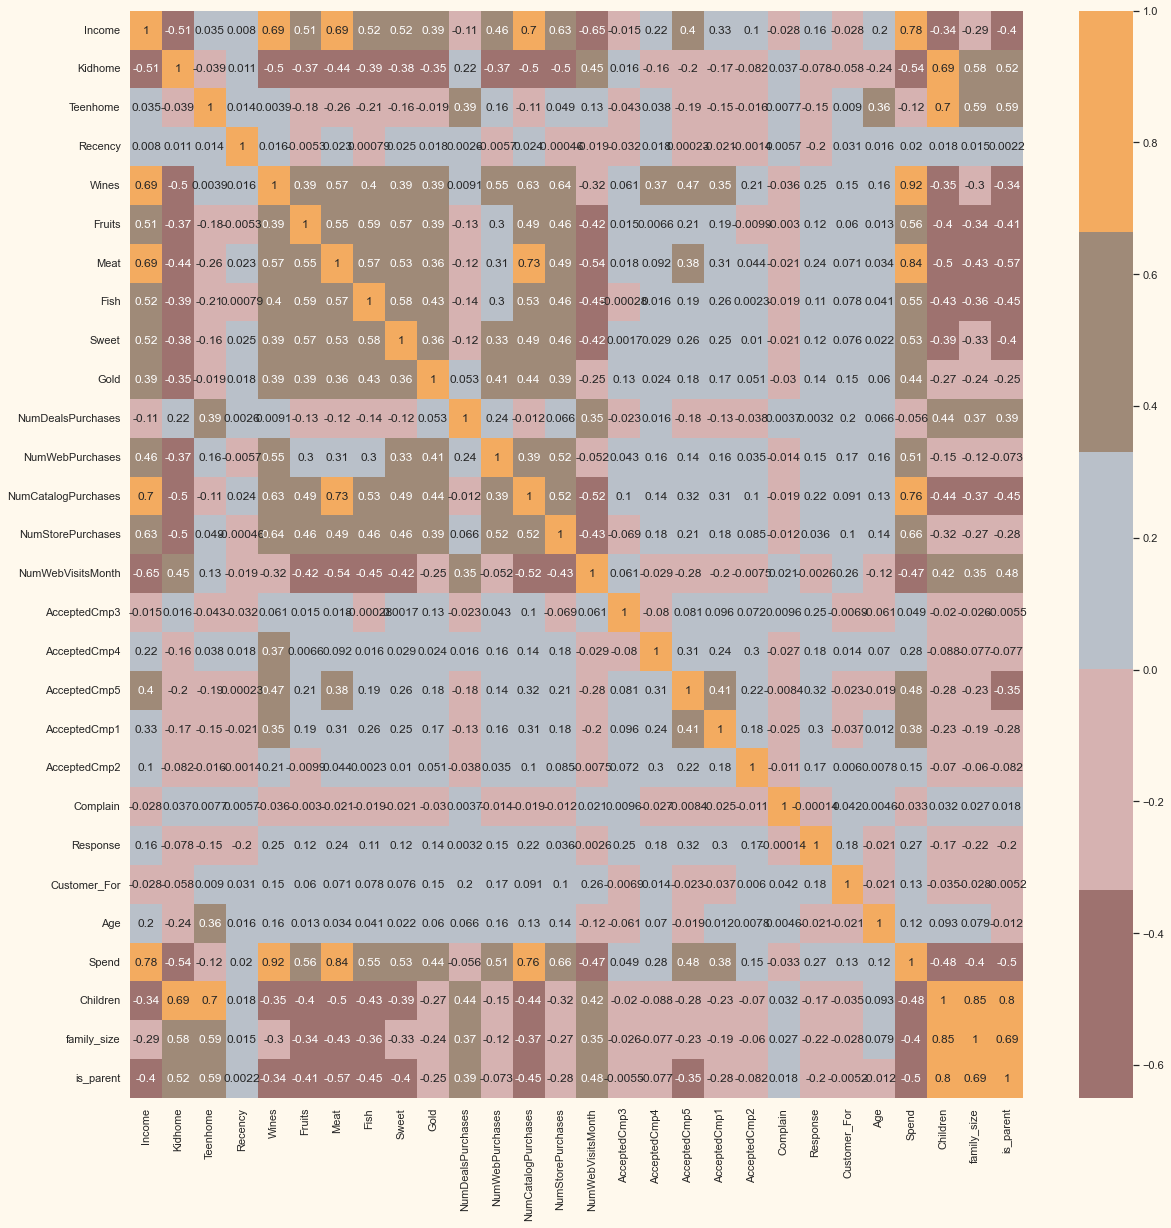

In [20]:
#correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(cust_seg.corr(),annot=True,cmap=cmap,center=0)

# Data Processing

The following steps are applied to preprocess the data:

    1.Label encoding the categorical features
    2.Scaling the features using the standard scaler
    3.Creating a subset dataframe for dimensionality reduction


In [21]:
s=(cust_seg.dtypes=='object')
object_col =list(s[s].index)
print("Categorical variables in the dataset:", object_col)

Categorical variables in the dataset: ['Education', 'Living_with']


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object_col:
    cust_seg[i] =cust_seg[[i]].apply(le.fit_transform)
print('All features are now numerical')

All features are now numerical


In [23]:
#Creating a copy of data
data =cust_seg.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions

col =['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
data.drop(col,axis=1,inplace=True)

#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
scaler_data =pd.DataFrame(scaler.transform(data),columns=data.columns)
print('All features are now scaled')

All features are now scaled


In [24]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaler_data.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spend,Living_with,Children,family_size,is_parent
0,-0.842688,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.478249,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.842688,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.922325,-1.349603,1.404572,0.449070,0.632456
2,-0.842688,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.198327,0.740959,-1.264598,-0.654644,-1.581139
3,-0.842688,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.889703,0.740959,0.069987,0.449070,0.632456
4,0.105443,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.315945,0.740959,0.069987,0.449070,0.632456


In [25]:
#Initiating PCA to reduce dimentions aka features to 3
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(scaler_data)
pca_data=pd.DataFrame(pca.transform(scaler_data),columns=('col1','col2','col3'))
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-9.636656e-18,2.866445,-5.957251,-2.530404,-0.778242,2.378376,7.406072
col2,2212.0,6.183521e-17,1.708431,-4.321657,-1.329337,-0.162848,1.241864,6.190243
col3,2212.0,4.316419e-17,1.221866,-3.557388,-0.834739,-0.017255,0.803395,6.596742


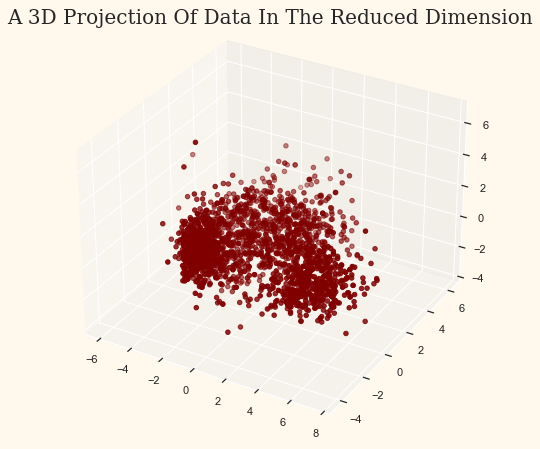

In [26]:
x=pca_data['col1']
y=pca_data['col2']
z=pca_data['col3']
#To plot
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='maroon',marker='o')
ax.set_title('A 3D Projection Of Data In The Reduced Dimension',size=20,y=1.03,fontfamily='serif')
plt.show()

# CLUSTERING

Steps involved in the Clustering

    1.Elbow Method to determine the number of clusters to be formed
    2.Clustering via Agglomerative Clustering
    3.Examining the clusters formed via scatter plot


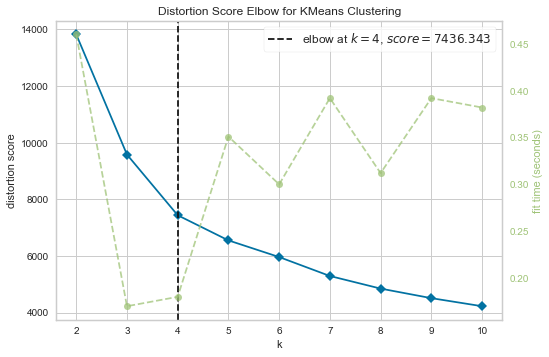

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(pca_data)
elbow.show()



The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.


In [34]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
ac=AgglomerativeClustering(n_clusters=4)
ac_data=ac.fit_predict(pca_data)
pca_data['cluters']=ac_data
# add data into original data
cust_seg['cluters']=ac_data



To examine the clusters formed let's have a look at the 3-D distribution of the clusters.


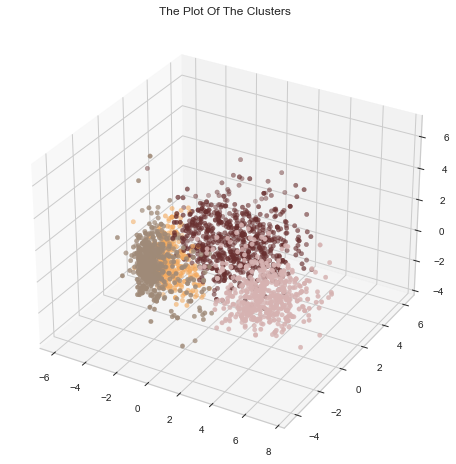

In [44]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=pca_data['cluters'],marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

# EVALUATING MODELS


Firstly, let us have a look at the group distribution of clustring

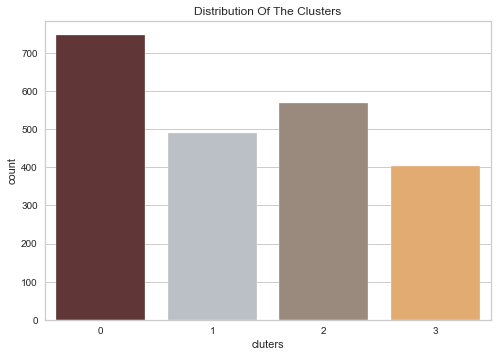

In [48]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
ax=sns.countplot(x=cust_seg['cluters'],palette=pal)
ax.set_title("Distribution Of The Clusters")
plt.show()

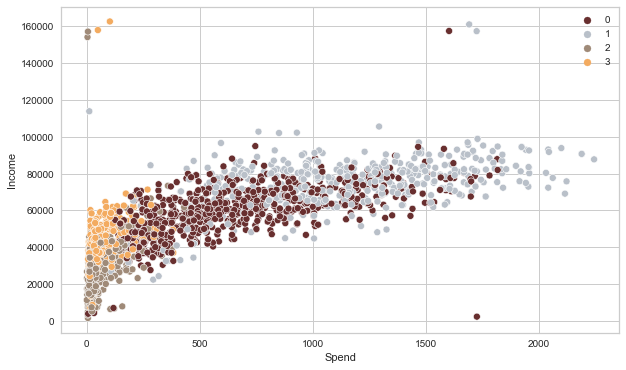

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=cust_seg['Spend'],y=cust_seg['Income'],hue=cust_seg['cluters'],palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

<AxesSubplot:xlabel='cluters', ylabel='Spend'>

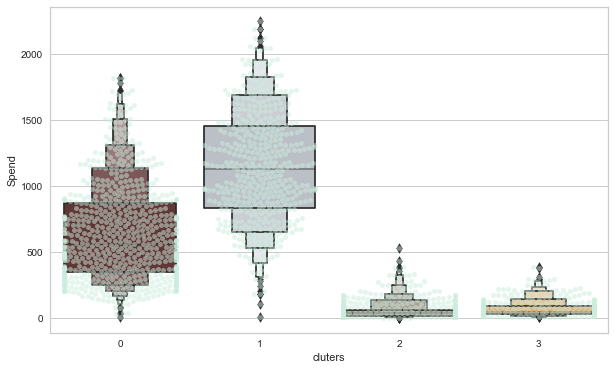

In [56]:
plt.figure(figsize=(10,6))
sns.swarmplot(y=cust_seg["Spend"],x=cust_seg["cluters"],color='#CBEDDD',alpha=0.5)
sns.boxenplot(y=cust_seg["Spend"],x=cust_seg["cluters"], palette= pal)


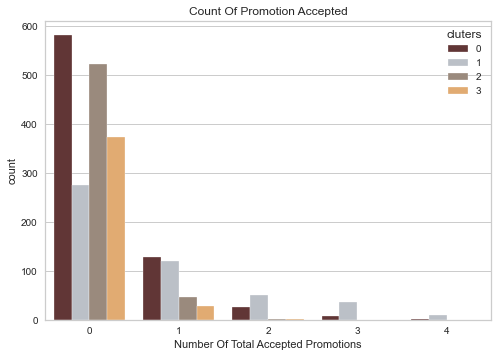

In [69]:
cust_seg['total_promo'] =cust_seg['AcceptedCmp3']+ cust_seg['AcceptedCmp4']+ cust_seg['AcceptedCmp5']+cust_seg['AcceptedCmp1']+ cust_seg['AcceptedCmp2']
sns.countplot(x=cust_seg['total_promo'],hue=cust_seg['cluters'],palette=pal)
plt.title("Count Of Promotion Accepted")
plt.xlabel("Number Of Total Accepted Promotions")
plt.show()



There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.


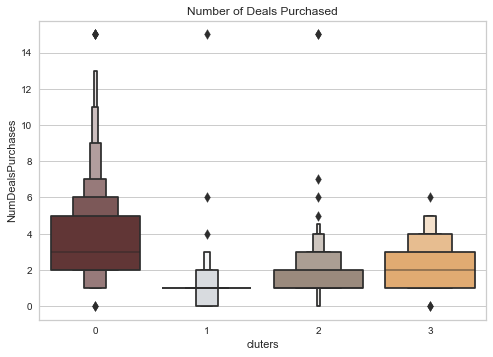

In [37]:
#Plotting the number of deals purchased
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.boxenplot(y=cust_seg["NumDealsPurchases"],x=cust_seg["cluters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()



Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly


## Profiling

<Figure size 576x396 with 0 Axes>

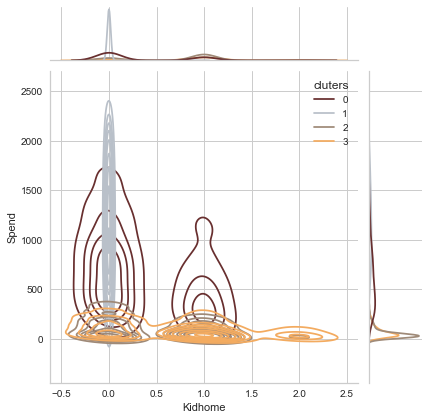

<Figure size 576x396 with 0 Axes>

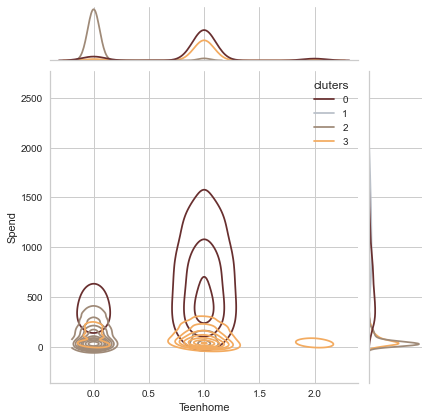

<Figure size 576x396 with 0 Axes>

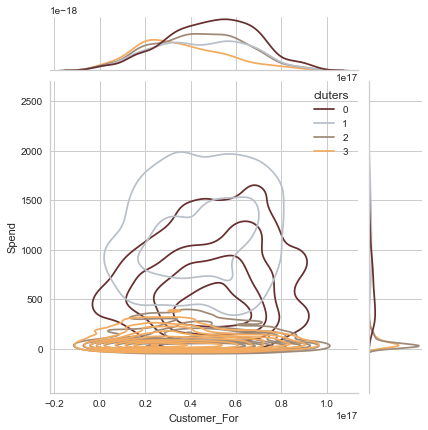

<Figure size 576x396 with 0 Axes>

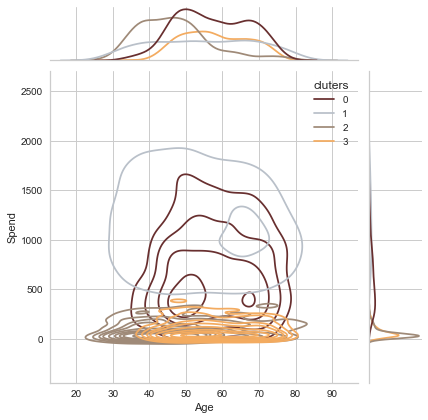

<Figure size 576x396 with 0 Axes>

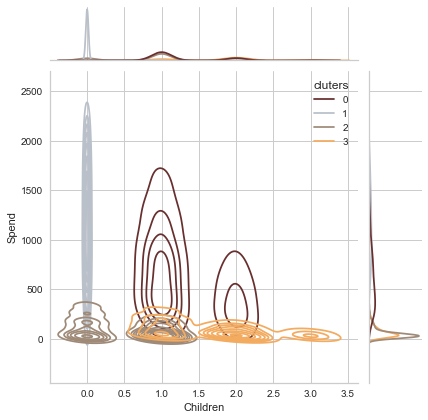

<Figure size 576x396 with 0 Axes>

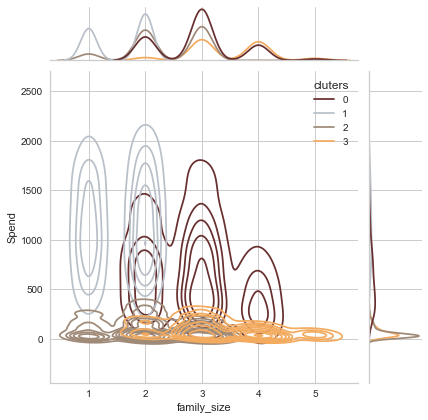

KeyError: 'is_Parent'

<Figure size 576x396 with 0 Axes>

In [41]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "family_size", "is_Parent", "Education","Living_With"]
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=cust_seg[i], y=cust_seg["Spend"],hue=cust_seg['cluters'] , kind="kde", palette=pal)
    plt.show()